<a href="https://colab.research.google.com/github/brauliosba/Machine-Learning---TA2/blob/main/TB2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

La red implementada en este colab puede ser aplicada para la virtualización de números escritos a mano. El dataset empleado fue el conjunto de entrnamiendo de Digit Recognizer, disponible en https://www.kaggle.com/c/digit-recognizer/data?select=train.csv.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import *
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
n_epochs = 10

In [4]:
path = "/content/drive/My Drive/Machine Learning/Datasets/train.csv"

In [7]:
data_set = pd.read_csv(path)
print(data_set.shape)

(42000, 785)


In [8]:
# separando el dataset en pixeles y labels
y = data_set['label']
X = data_set.drop(labels = ['label'], axis=1) 
# liberando memoria
del data_set

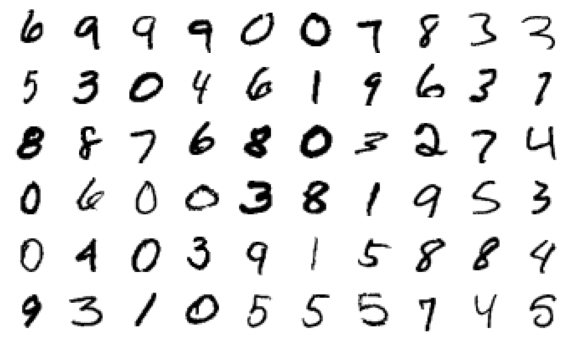

In [18]:
# muestra aleatoria de imagenes
fig, axs = plt.subplots(6, 10, figsize=(10, 6)) # 6 rows of 10 images

for ax in axs.flat:
    i = randrange(X.shape[0])
    ax.imshow(X.loc[i].values.reshape(28, 28), cmap='gray_r')
    ax.set_axis_off()

In [12]:
# normalizando los valores en rango 0 a 1
X = X / 255.0

In [13]:
# reshape de imagenes
img_size = 28
X_cnn = X.values.reshape(-1, img_size, img_size, 1)
# revisión
print(X_cnn.shape)

(42000, 28, 28, 1)


In [23]:
#creación del dataset de entrenamiento y test
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y, test_size = 0.10)

In [24]:
cnn = Sequential()
    
cnn.add(Conv2D(28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) 
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())         
cnn.add(Dense(64, activation='sigmoid'))
cnn.add(Dropout(rate=0.1)) 
cnn.add(Dense(10, activation='softmax'))
    
cnn.compile( 
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                302912    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 303,842
Trainable params: 303,842
Non-trainable params: 0
________________________________________________

In [25]:
# entrenamiento y validación del modelo
history = cnn.fit(
    X_train_cnn,
    to_categorical(y_train_cnn),
    epochs=n_epochs,  
    validation_data=(X_test_cnn, to_categorical(y_test_cnn)), 
    batch_size=32
)

Epoch 1/10
1182/1182 [==============================] - 24s 20ms/step - loss: 0.3582 - accuracy: 0.9067 - val_loss: 0.1337 - val_accuracy: 0.9650
Epoch 2/10
1182/1182 [==============================] - 19s 16ms/step - loss: 0.1150 - accuracy: 0.9688 - val_loss: 0.0832 - val_accuracy: 0.9771
Epoch 3/10
1182/1182 [==============================] - 19s 16ms/step - loss: 0.0741 - accuracy: 0.9798 - val_loss: 0.0635 - val_accuracy: 0.9821
Epoch 4/10
1182/1182 [==============================] - 19s 16ms/step - loss: 0.0550 - accuracy: 0.9842 - val_loss: 0.0568 - val_accuracy: 0.9826
Epoch 5/10
1182/1182 [==============================] - 19s 16ms/step - loss: 0.0421 - accuracy: 0.9884 - val_loss: 0.0500 - val_accuracy: 0.9845
Epoch 6/10
1182/1182 [==============================] - 19s 16ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.0507 - val_accuracy: 0.9845
Epoch 7/10
1182/1182 [==============================] - 19s 16ms/step - loss: 0.0264 - accuracy: 0.9927 - val_loss: 0.0465 -

In [29]:
# impresión de precisión, recall y f1-score
y_pred = cnn.predict(X_test_cnn, batch_size=32, verbose=1)
y_pred_cate = np.argmax(y_pred, axis=1)
print(classification_report(y_test_cnn, y_pred_cate))

132/132 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       407
           1       0.99      0.99      0.99       468
           2       0.99      0.99      0.99       427
           3       0.99      0.98      0.99       415
           4       0.98      0.97      0.98       407
           5       0.98      0.98      0.98       379
           6       0.99      1.00      1.00       427
           7       0.97      0.98      0.98       435
           8       0.99      0.99      0.99       418
           9       0.98      0.99      0.98       417

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



In [31]:
# entrenamiento y test set para el mlp
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X, y, test_size = 0.10)

In [32]:
# definir modelo mlp 
mlp = Sequential()
mlp.add(Dense(128, activation='relu', input_shape=(784,)))
mlp.add(Dense(64, activation='sigmoid'))  
mlp.add(Dense(10, activation='softmax'))

mlp.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [34]:
# entrenamiento y validación del modelo
history2 = mlp.fit(
    X_train_mlp,
    to_categorical(y_train_mlp),
    epochs = n_epochs,  
    validation_data = (X_test_mlp, to_categorical(y_test_mlp)),
    batch_size = 32,
)

Epoch 1/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.1526 - accuracy: 0.9549 - val_loss: 0.1269 - val_accuracy: 0.9614
Epoch 2/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.1015 - accuracy: 0.9695 - val_loss: 0.1048 - val_accuracy: 0.9686
Epoch 3/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0738 - accuracy: 0.9780 - val_loss: 0.1044 - val_accuracy: 0.9683
Epoch 4/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0554 - accuracy: 0.9839 - val_loss: 0.0972 - val_accuracy: 0.9693
Epoch 5/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.0872 - val_accuracy: 0.9721
Epoch 6/10
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0325 - accuracy: 0.9904 - val_loss: 0.0882 - val_accuracy: 0.9731
Epoch 7/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0244 - accuracy: 0.9927 - val_loss: 0.0880 - val_accuracy:

In [38]:
# impresión de precisión, recall y f1-score
y_pred = mlp.predict(X_test_mlp, batch_size=32, verbose=1)
y_pred_cate = np.argmax(y_pred, axis=1)
print(classification_report(y_test_mlp, y_pred_cate))

132/132 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       407
           1       0.96      1.00      0.98       460
           2       0.97      0.97      0.97       433
           3       0.98      0.95      0.96       459
           4       0.96      0.99      0.97       410
           5       0.97      0.95      0.96       369
           6       0.94      1.00      0.97       414
           7       0.97      0.98      0.97       444
           8       0.96      0.90      0.93       410
           9       0.98      0.95      0.97       394

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



In [44]:
def graphLearningCurve(modelHistory, xLabel):
  plt.plot(modelHistory.history[xLabel])
  plt.plot(modelHistory.history['val_' + xLabel])
  plt.title('model ' + xLabel)
  plt.ylabel(xLabel)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

Curva de aprendizaje del modelo CNN

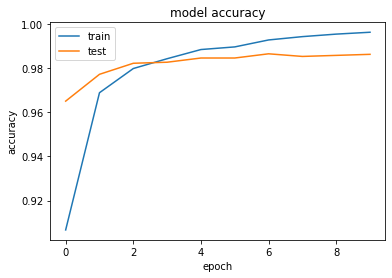

In [45]:
graphLearningCurve(history, 'accuracy')

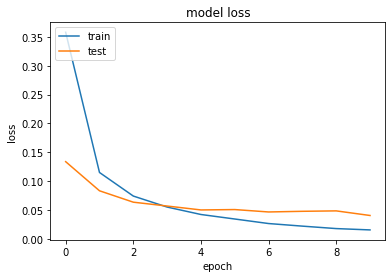

In [46]:
graphLearningCurve(history, 'loss')

Curva de aprendizaje del modelo MLP

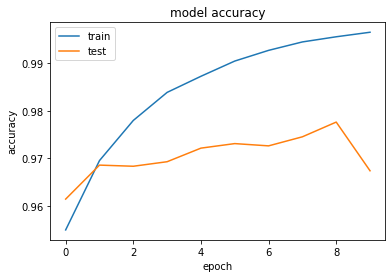

In [47]:
graphLearningCurve(history2, 'accuracy')

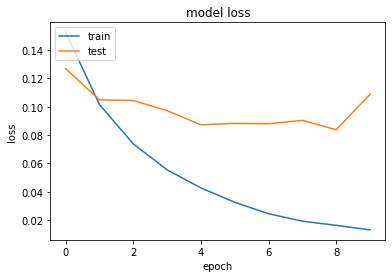

In [48]:
graphLearningCurve(history2, 'loss')